<a href="https://colab.research.google.com/github/arielle00/CMPE252-AI/blob/main/CMPE252_SEC01_SP2023_HW01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Home Assigment 1, CMPE 252, Section 01, Fall 2023, San Jose State University
#### Informative Search using A* Algorithm and its comparison to uninformed search methods (BFS, Dijkstra)
All the required utility functions are provided at the beginning of this notebook. There are 8 tasks
after the utility functions, and a bonus task (10 additional points to HW1, if solved correclty).

**This assignment is individual**.

The deadline is Septemper 14, 2023, 11:59PM. The submission is in Canvas.

**please submit two separate files (not in a ZIP file) this notebook and its corresponding PDF (File->Download as -> PDF)**

In [1]:
import os
import time

print(os.getcwd())

/content


import the necessary libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import networkx as nx
%matplotlib inline

'build_maze' builds the maze from 'maze_file.txt'.

In [3]:
def build_maze(maze_file):
    '''
    para1: filename of the maze txt file
    return mazes as a numpy array walls: 0 - no wall, 1 - wall in the maze
    '''
    a = open(maze_file, 'r')
    m=[]
    j = 0
    for i in a.readlines():
        # print(j)
        # print(i.split(" "))
        m.append(np.array(i.split(" "), dtype="int32"))
        j=j+1
    out = np.array(m)
    #print
    return np.array(m)

define START and GOAL states within the maze

***Visualize the maze***:

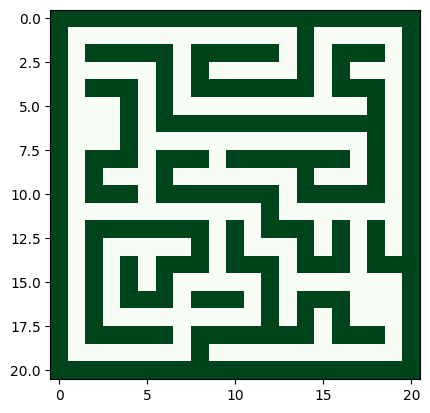

In [4]:
# (you are encouraged to look at the API of 'imshow')
plt.imshow(build_maze("maze_20x20.txt"), cmap='Greens')


In [5]:
START=(1, 1)
GOAL=(19,19)

'Find_the_edges' builds the graph for the maze, assuming that the robot can move only in the four directions (Up, Down, Right, Left).

In [6]:
def Find_the_edges(maze):
    '''
    para1: numpy array of the maze structure
    return graph of the connected nodes
    '''
    graph={}
    grid_size=len(maze)
    for i in range(grid_size):
        for j in range(grid_size):
            if(maze[i][j]!=1):
                adj=[]
                eles=[]
                if i - 1 >= 0:
                    eles.append((i-1,j))
                if i + 1 < grid_size:
                    eles.append((i+1,j))
                if j - 1 >=0:
                    eles.append((i,j-1))
                if j+1< grid_size:
                    eles.append((i,j+1))
                for ele in eles:
                    if maze[ele[0]][ele[1]] == 0 or maze[ele[0]][ele[1]]=='3' :
                        adj.append((ele[0],ele[1]))
                graph[(i,j)]=adj
    return graph

***Breadth First Search (BFS)***

In [7]:
from collections import deque
def BreadthFirst(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    queue = deque([([start], start)])
    visited = set()

    while queue:
        path, current = queue.popleft()
        #print(path, current)
        if current == goal:
            #print( path)
            return visited, np.array(path)
        if current in visited:
            continue
        #print(current)
        visited.add(current)
        for neighbour in graph[current]:
            #print(graph[current])
            p = list(path)
            p.append(neighbour)
            queue.append((p, neighbour))
    return None
'''
visited nodes - mark them as -3 in maze numpy array
path- mark them as -1 in maze numpy array
and Visualize the maze
'''

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [8]:
#example for visualization of maze with visited nodes and shortest path
#visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_20x20.txt")
graph=Find_the_edges(maze1)
visited, path = BreadthFirst(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

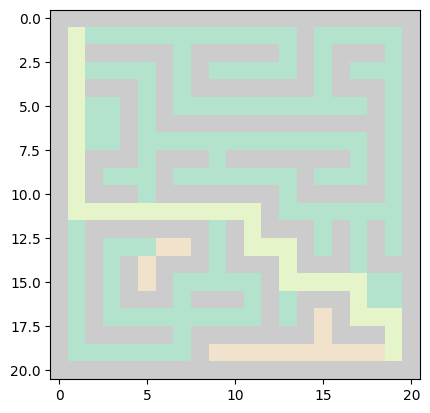

In [9]:
plt.imshow(maze1, cmap='Pastel2')

- ***gray cells*** means the walls of the maze
- ***dark green cells*** means the visited cells of the maze
- ***light green cells*** means the shortest path of the maze
- ***light brown*** means the unvisited cells of the maze

***A**** ***-search***

In [10]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []

    def empty(self) -> bool:
        return not self.elements

    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))

    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal, w, h_fn):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    visited = set()

    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        visited.add(current)

        for next in (graph[current]):
            #graph[current]=-1
            new_cost = cost_so_far[current] + 1
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost

                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter

                priority = new_cost + w*h_fn(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current=goal
    path = []
    while current != start:
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start)
    path.reverse()
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array
path- mark them as -1 in maze numpy array
and Visualize the maze
'''

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

***Dijkstra Algorithm***

In [11]:

def dijkstra_algorithm(graph, start_node, GOAL):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    unvisited_nodes = list(graph.keys())

    # We'll use this dict to save the cost of visiting each node and update it as we move along the graph
    shortest_path = {}

    # We'll use this dict to save the shortest known path to a node found so far
    previous_nodes = {}

    # We'll use max_value to initialize the "infinity" value of the unvisited nodes
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value
    # However, we initialize the starting node's value with 0
    shortest_path[start_node] = 0

    # The algorithm executes until we visit all nodes
    while GOAL in unvisited_nodes:
        # The code block below finds the node with the lowest score
        current_min_node = None
        for node in unvisited_nodes: # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node

        # The code block below retrieves the current node's neighbors and updates their distances
        neighbors = graph[current_min_node]
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + 1
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node

        # After visiting its neighbors, we mark the node as "visited"
        unvisited_nodes.remove(current_min_node)

    current= GOAL
    path = []
    while current != START:
        path.append(current)
        #print(previous_nodes[current])
        current = previous_nodes[current]
    path.append(START)
    path.reverse()
    return previous_nodes, path
'''
visited nodes - mark them as -3 in maze numpy array
path- mark them as -1 in maze numpy array
and Visualize the maze
'''


'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

### Task - 1

Build your maze with dimentions 25 x 25 and a similar complexity (number of obstacles/fences)
as in the maze provided in 'maze_20x20.txt'. Check that there exists a path between START at the
(1, 1) and the GOAL at (25, 25) in your maze. Store your maze to 'my_maze_25x25.txt'. Visualize your maze.
Use your maze in the below tasks.

### Task - 2

A* algorithm requires a heuristic function. You will try two following heuristics:
- Euclidean distance between the cell coordinates
- Manhattan distance between the cell coordinates

In [12]:
def Euclidean_distance(node1, node2):
    '''
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Euclidean distance between the 2 nodes
    '''
    return ((node1[0] - GOAL[0])**2 + (node1[1] - GOAL[1])**2)**0.5
    pass



In [13]:
# implement the Manhattan distance between the 2 nodes, and update the code for A* accordingly
def Manhattan_distance(node1, node2):
    '''
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Manhattan distance between the 2 nodes
    '''
    return (abs(node1[0]-node2[0]) + abs(node1[1]-node2[1]))
#     refer to https://xlinux.nist.gov/dads/HTML/manhattanDistance.html
    pass

In [45]:
def search_maze(START, GOAL, w, h_fn):
  start_time = time.time()
  maze2 = build_maze("my_maze_25x25.txt")
  graph = Find_the_edges(maze2)
  # print(graph)
  # START=(1, 1)
  # GOAL=(24,24)

  came_from, path = astar_path(graph, START, GOAL, w, h_fn)
  end_time = time.time()

  print("Distance visited nodes amount:",len(came_from))
  #print("Shortest path nodes:",path)
  print("Shortest path:",len(path))

  for i in came_from:
    maze2[i[0],i[1]]=-3
  for i in path:
    maze2[i[0],i[1]]=-1
  plt.imshow(maze2, cmap='Pastel2')
  plt.show()
  # print(came_from)
  return end_time-start_time, came_from

Run A* with these two heuristic functions for W=1 and find the shortest path and its length in the maze. You can update the interface of astar_path to accept W and a heuristic function

Euclidean
Distance visited nodes amount: 250
Shortest path: 47


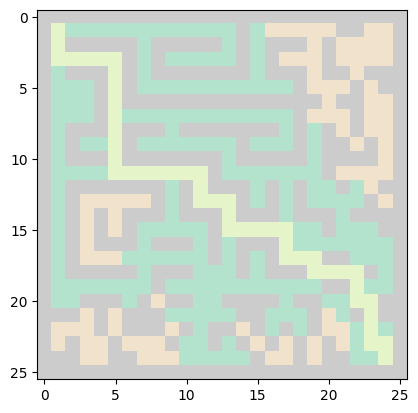

Euclidean total time: 0.010493278503417969


Manhattan
Distance visited nodes amount: 227
Shortest path: 47


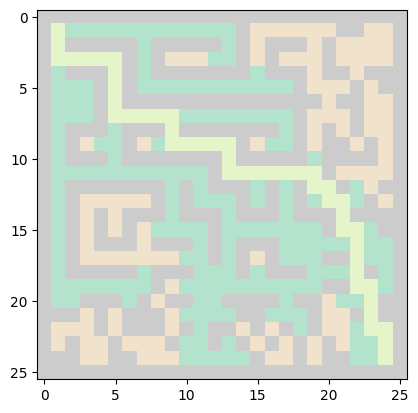

Manhattan total time: 0.009282827377319336


In [46]:

print("Euclidean")
total_time,x = search_maze((1,1), (24,24), 1, Euclidean_distance)
print("Euclidean total time:",total_time)
print("\n")
print("Manhattan")
total_time,x = search_maze((1,1), (24,24), 1, Manhattan_distance)
print("Manhattan total time:",total_time)

### Task - 3


In this task you are asked to solve the maze with 4 different weights, W, in A* for each of the heurstic function mentioned above. Visualize the solution for each W and each heurstic on a separate plot in the same format as in the examle above (see cell 17). ***Chose a broad set of values for W to see the difference.***

-----------------Euclidean-----------------
Distance visited nodes amount: 306
Shortest path: 47


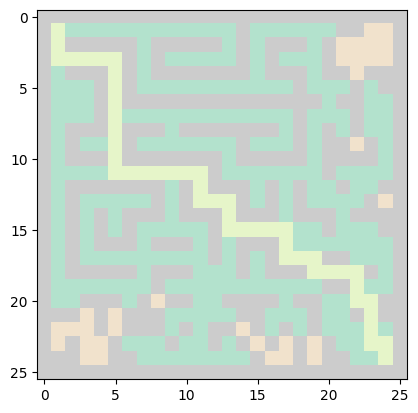

0.008469820022583008
Distance visited nodes amount: 304
Shortest path: 47


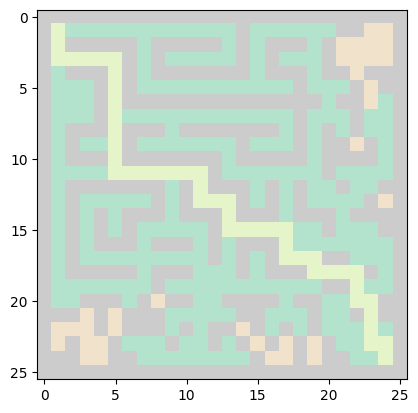

0.008392333984375
Distance visited nodes amount: 275
Shortest path: 47


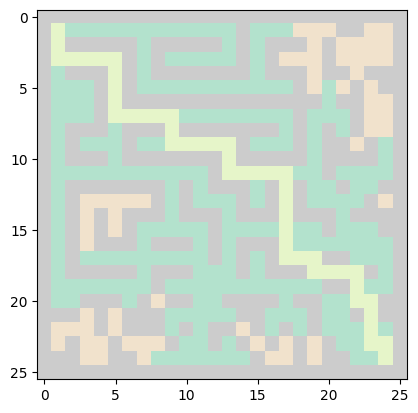

0.006708621978759766
Distance visited nodes amount: 160
Shortest path: 57


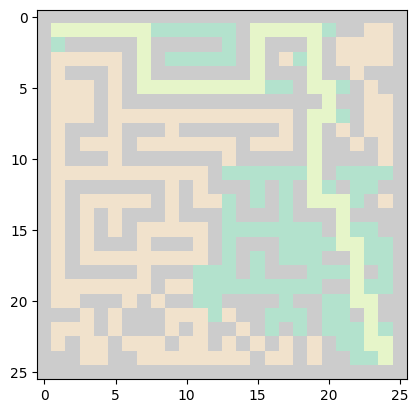

0.008467674255371094
Distance visited nodes amount: 142
Shortest path: 57


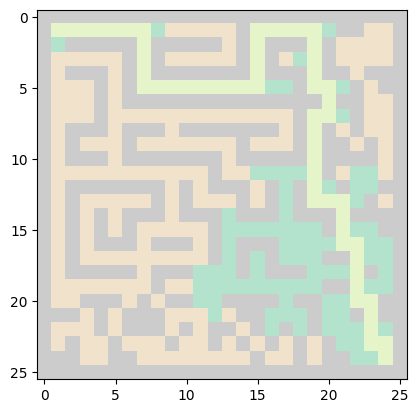

0.008485078811645508


In [16]:
print("-----------------Euclidean-----------------")
weights_euclidean = [0.3,0.8,2,5,10]
times_euclidean = []
came_from = []

for weight in weights_euclidean:
    elapsed_time, search_path = search_maze(weight, Euclidean_distance)
    times_euclidean.append(elapsed_time)
    came_from.append(len(search_path))
    print(elapsed_time)


-----------------Manhattan-----------------
Distance visited nodes amount: 252
Shortest path: 47


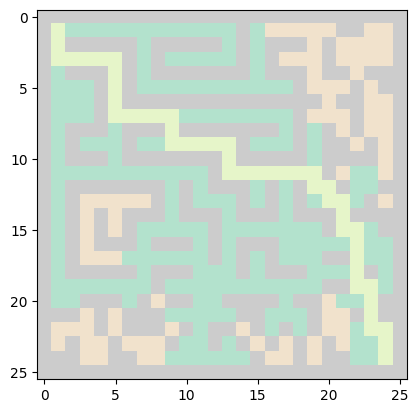

0.009081363677978516
Distance visited nodes amount: 113
Shortest path: 49


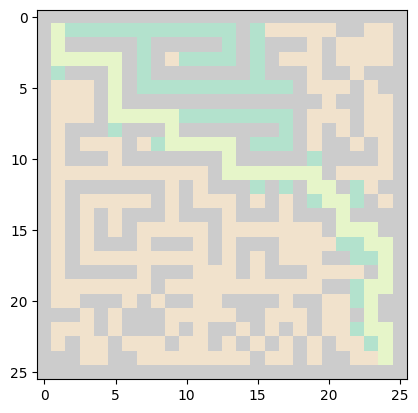

0.008164405822753906
Distance visited nodes amount: 90
Shortest path: 59


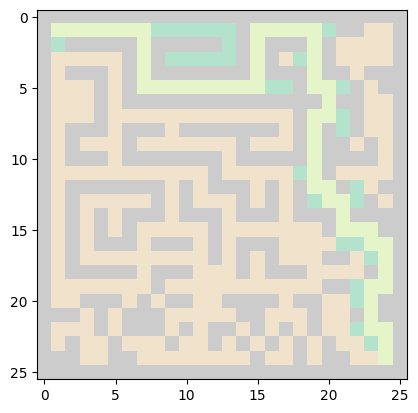

0.010004997253417969
Distance visited nodes amount: 90
Shortest path: 59


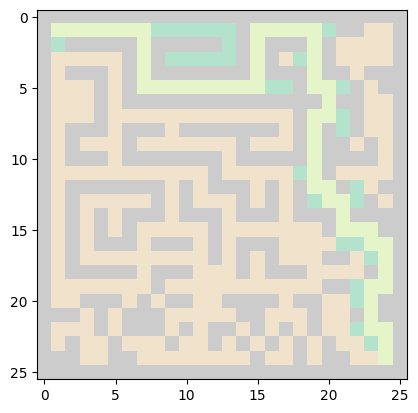

0.006563663482666016


In [17]:
print("-----------------Manhattan-----------------")
weights_manhattan = [0.8,1.6,5,10]
times_manhattan = []
came_from_manh = []


for weight in weights_manhattan:
    elapsed_time, search_path = search_maze(weight, Manhattan_distance)
    times_manhattan.append(elapsed_time)
    came_from_manh.append(len(search_path))
    print(elapsed_time)


Explain what changes you observe for the different weights and why it occurs.

For the Euclidean distance the shortest path increased when I used higher weights such as 5 and 10. When I tried w = 2 he shortest path was the same as weight=1 but the nodes explored increased. From observation it seems that a weight closer to 1 is the best, least nodes explored and optimal shortest path. Less and 1 also got us the optomal shortest path but explored more nodes.

For the Manhattan distance, when I tried w=0.8, I got the optimal shortest path but it explored more nodes than w=1. But, anything above 1.5 gave me the non optimal shortest path but did explore much less nodes. The best result is given when the weight is closer to 1.

### Task - 4


Plot on plt.subplot(121) a) time taken VS Weights

Plot on plt.subplot(122) b) search space (expanded nodes) VS Weights

-- add titles, axis labels, and legends.

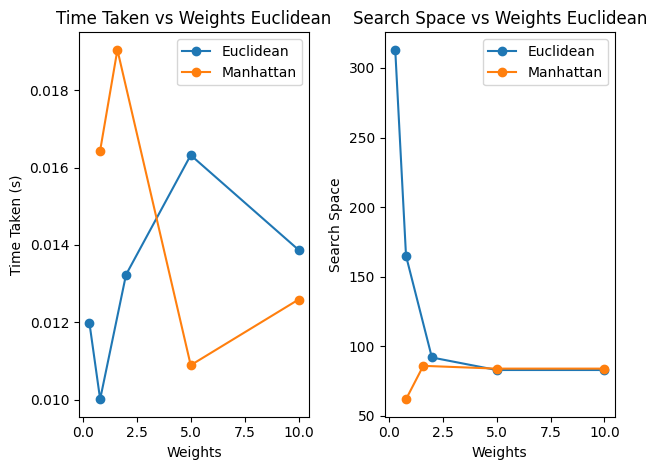

In [84]:
plt.subplot(121)
plt.plot(weights_euclidean, times_euclidean, marker='o', label='Euclidean')
plt.plot(weights_manhattan, times_manhattan, marker='o', label='Manhattan')
plt.xlabel('Weights')
plt.ylabel('Time Taken (s)')
plt.title('Time Taken vs Weights Euclidean')
plt.legend(loc="upper right")

plt.subplot(122)
plt.plot(weights_euclidean, came_from, marker='o', label='Euclidean')
plt.plot(weights_manhattan, came_from_manh, marker='o', label='Manhattan')
plt.xlabel('Weights')
plt.ylabel('Search Space')
plt.title('Search Space vs Weights Euclidean')
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

### Task - 5

Solve the maze with the Dijkstra algorithm, and visualize the solution in the maze. What is the length of the shortest path?

Shortest path for Dijkstra: 47


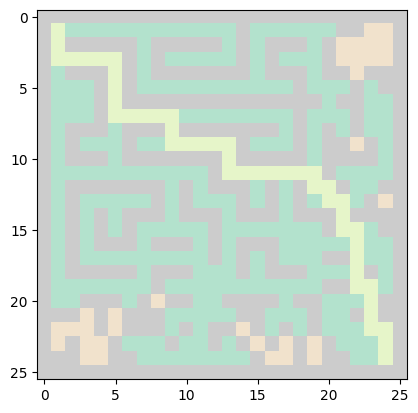

In [21]:
my_maze = build_maze("my_maze_25x25.txt")
my_graph = Find_the_edges(my_maze)
START=(1,1)
GOAL=(24,24)

prev_nodes, path = dijkstra_algorithm(my_graph, START, GOAL)
print("Shortest path for Dijkstra:",len(path))

for i in prev_nodes:
  my_maze[i[0],i[1]]=-3
for i in path:
  my_maze[i[0],i[1]]=-1
plt.imshow(my_maze, cmap='Pastel2')
plt.show()


### Task - 6

Solve the maze with the BFS algorithm, and visualize the solution in the maze. What is the length of the shortest path?

Shortest path for BFS: 47


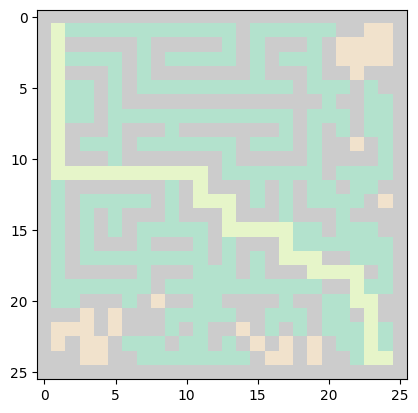

In [22]:
my_maze = build_maze("my_maze_25x25.txt")
my_graph = Find_the_edges(my_maze)
START=(1,1)
GOAL=(24,24)

prev_nodes, path = BreadthFirst(my_graph, START, GOAL)
print("Shortest path for BFS:",len(path))

for i in prev_nodes:
  my_maze[i[0],i[1]]=-3
for i in path:
  my_maze[i[0],i[1]]=-1
plt.imshow(my_maze, cmap='Pastel2')
plt.show()

### Task - 7

Choose 3 random START and GOAL states, and repeat the tasks 2 - 6, and visualize the solution for each. Use W=1 in this task. Explain your observations.

Euclidean
Distance visited nodes amount: 84
Shortest path: 31


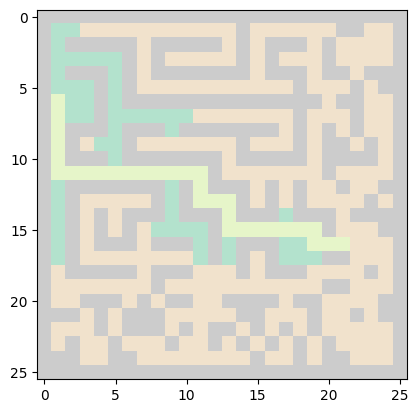

Manhattan
Distance visited nodes amount: 62
Shortest path: 31


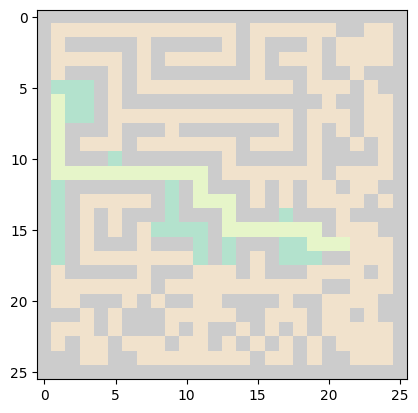

Shortest path for Dijkstra: 31


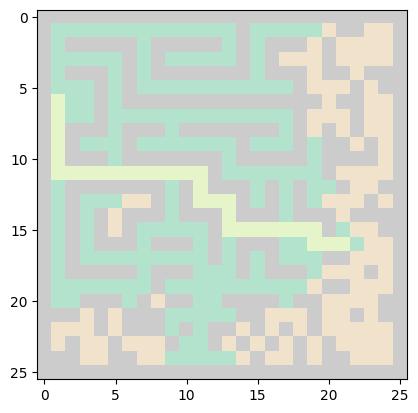

Shortest path for BFS: 31


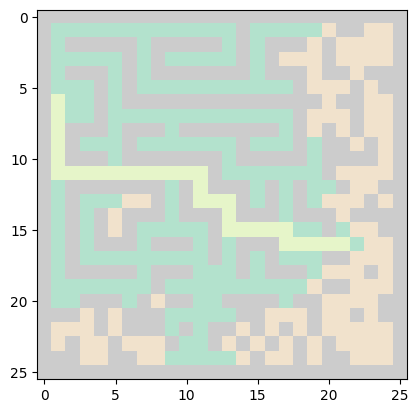

In [51]:
#### FIRST RANDOM START&GOAL
print("Euclidean")
total_time,x = search_maze((6,1), (16,21), 1, Euclidean_distance)

print("Manhattan")
total_time,x = search_maze((6,1), (16,21), 1, Manhattan_distance)

my_maze = build_maze("my_maze_25x25.txt")
my_graph = Find_the_edges(my_maze)
START=(6,1)
GOAL=(16,21)

prev_nodes, path = dijkstra_algorithm(my_graph, START, GOAL)
print("Shortest path for Dijkstra:",len(path))

for i in prev_nodes:
  my_maze[i[0],i[1]]=-3
for i in path:
  my_maze[i[0],i[1]]=-1
plt.imshow(my_maze, cmap='Pastel2')
plt.show()


prev_nodes, path = BreadthFirst(my_graph, START, GOAL)
print("Shortest path for BFS:",len(path))

for i in prev_nodes:
  my_maze[i[0],i[1]]=-3
for i in path:
  my_maze[i[0],i[1]]=-1
plt.imshow(my_maze, cmap='Pastel2')
plt.show()

Euclidean
Distance visited nodes amount: 303
Shortest path: 50


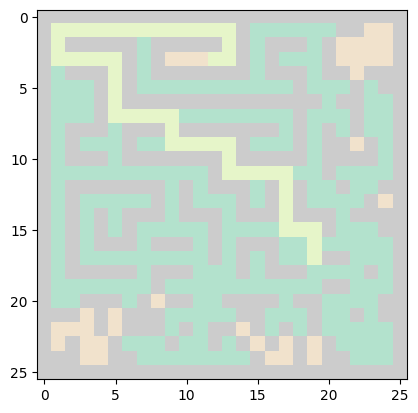

Manhattan
Distance visited nodes amount: 296
Shortest path: 50


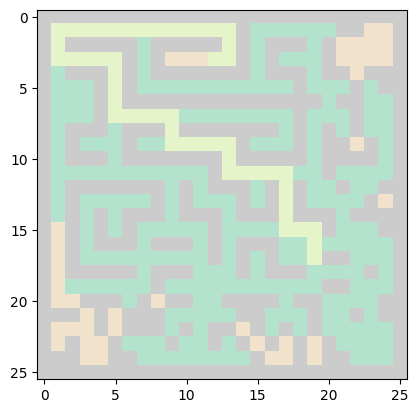

Shortest path for Dijkstra: 50


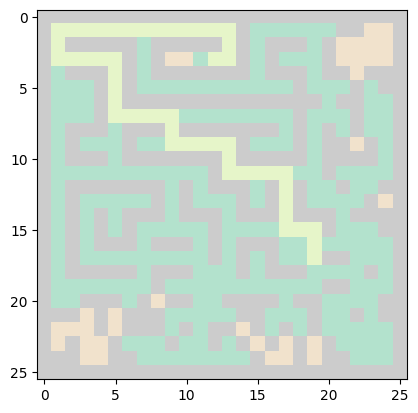

Shortest path for BFS: 50


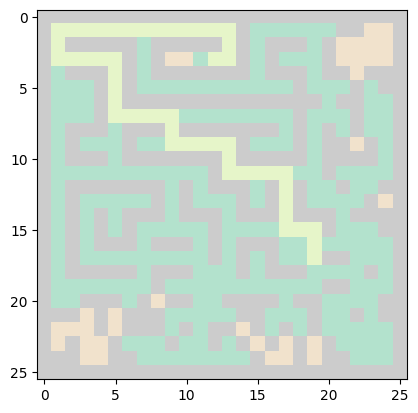

In [52]:
#### SECOND RANDOM START&GOAL
print("Euclidean")
total_time,x = search_maze((17,19), (3,12), 1, Euclidean_distance)

print("Manhattan")
total_time,x = search_maze((17,19), (3,12), 1, Manhattan_distance)

my_maze = build_maze("my_maze_25x25.txt")
my_graph = Find_the_edges(my_maze)
START=(17,19)
GOAL=(3,12)

prev_nodes, path = dijkstra_algorithm(my_graph, START, GOAL)
print("Shortest path for Dijkstra:",len(path))

for i in prev_nodes:
  my_maze[i[0],i[1]]=-3
for i in path:
  my_maze[i[0],i[1]]=-1
plt.imshow(my_maze, cmap='Pastel2')
plt.show()

prev_nodes, path = BreadthFirst(my_graph, START, GOAL)
print("Shortest path for BFS:",len(path))

for i in prev_nodes:
  my_maze[i[0],i[1]]=-3
for i in path:
  my_maze[i[0],i[1]]=-1
plt.imshow(my_maze, cmap='Pastel2')
plt.show()


Euclidean
Distance visited nodes amount: 88
Shortest path: 20


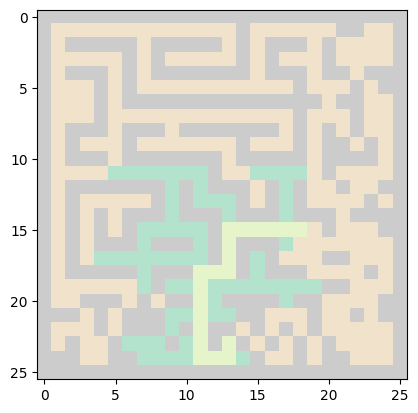

Manhattan
Distance visited nodes amount: 37
Shortest path: 20


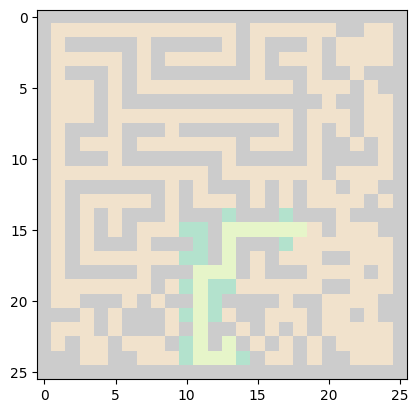

Shortest path for Dijkstra: 20


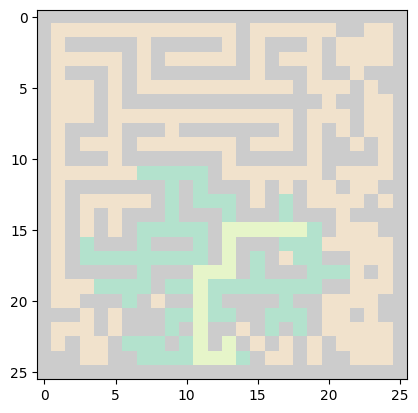

Shortest path for BFS: 20


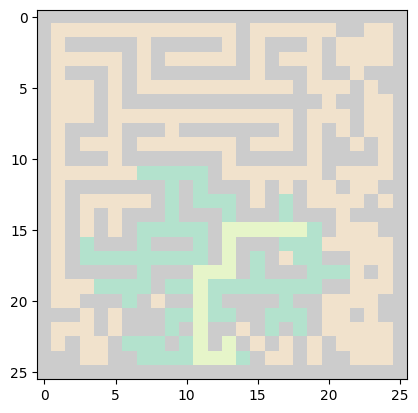

In [53]:
#### THIRD RANDOM START&GOAL

print("Euclidean")
total_time,x = search_maze((23,13), (15,18), 1, Euclidean_distance)

print("Manhattan")
total_time,x = search_maze((23,13), (15,18), 1, Manhattan_distance)

my_maze = build_maze("my_maze_25x25.txt")
my_graph = Find_the_edges(my_maze)
START=(23,13)
GOAL=(15,18)

prev_nodes, path = dijkstra_algorithm(my_graph, START, GOAL)
print("Shortest path for Dijkstra:",len(path))

for i in prev_nodes:
  my_maze[i[0],i[1]]=-3
for i in path:
  my_maze[i[0],i[1]]=-1
plt.imshow(my_maze, cmap='Pastel2')
plt.show()


prev_nodes, path = BreadthFirst(my_graph, START, GOAL)
print("Shortest path for BFS:",len(path))

for i in prev_nodes:
  my_maze[i[0],i[1]]=-3
for i in path:
  my_maze[i[0],i[1]]=-1
plt.imshow(my_maze, cmap='Pastel2')
plt.show()

### Task - 8

The initally assumation which we made in the Find_the_edges() is the robot can only move in UP, DOWN, LEFT and RIGHT. Now it can move diagonally as well. Modifiy the function and repeat the tasks 1-6 (and visualize the solution for each). Use W=1 in this task (non need in **"Chose a broad set of values for W to see the difference"**). Explain your observations

In [66]:
def search_maze_diag(START, GOAL, w, h_fn):
  start_time = time.time()
  maze2 = build_maze("my_maze_25x25.txt")
  graph = Find_the_edges_with_diagonal(maze2)

  came_from, path = astar_path(graph, START, GOAL, w, h_fn)
  end_time = time.time()

  print("Distance visited nodes amount:",len(came_from))
  #print("Shortest path nodes:",path)
  print("Shortest path:",len(path))

  for i in came_from:
    maze2[i[0],i[1]]=-3
  for i in path:
    maze2[i[0],i[1]]=-1
  plt.imshow(maze2, cmap='Pastel2')
  plt.show()
  # print(came_from)
  return end_time-start_time, came_from

In [67]:
def Find_the_edges_with_diagonal(maze):
    '''
    para1: numpy array of the maze structure
    return graph of the connected nodes
    '''
    graph={}
    grid_size=len(maze)
    for i in range(grid_size):
        for j in range(grid_size):
            if(maze[i][j]!=1):
                adj=[]
                eles=[]
                if i - 1 >= 0:
                    eles.append((i-1,j))
                if i + 1 < grid_size:
                    eles.append((i+1,j))
                if j - 1 >=0:
                    eles.append((i,j-1))
                if j+1< grid_size:
                    eles.append((i,j+1))

                if i-1>=0 and j-1>=0:
                    eles.append((i-1,j-1))
                if i-1>=0 and j+1<grid_size:
                    eles.append((i-1,j+1))
                if i+1<grid_size and j-1>=0:
                    eles.append((i-1,j+1))
                if i+1<grid_size and j+1<grid_size:
                    eles.append((i+1,j+1))


                for ele in eles:
                    if maze[ele[0]][ele[1]] == 0 or maze[ele[0]][ele[1]]=='3' :
                        adj.append((ele[0],ele[1]))
                graph[(i,j)]=adj
    return graph

Euclidean
Distance visited nodes amount: 63
Shortest path: 33


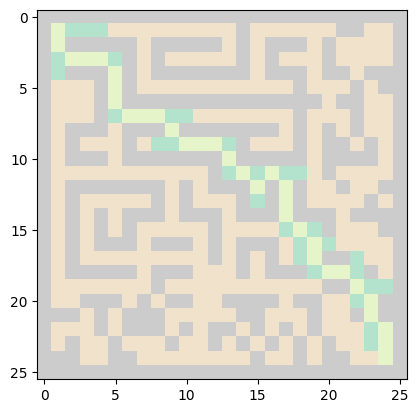

Euclidean total time: 0.011864662170410156


Manhattan
Distance visited nodes amount: 95
Shortest path: 34


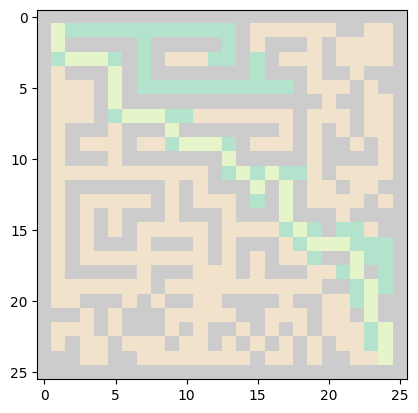

Manhattan total time: 0.010443687438964844


In [71]:
START = (1,1)
GOAL = (24,24)
print("Euclidean")
total_time,x = search_maze_diag(START, GOAL, 1, Euclidean_distance)
print("Euclidean total time:",total_time)
print("\n")
print("Manhattan")
total_time,x = search_maze_diag(START, GOAL, 1, Manhattan_distance)
print("Manhattan total time:",total_time)

-----------------Euclidean-----------------
Distance visited nodes amount: 313
Shortest path: 32


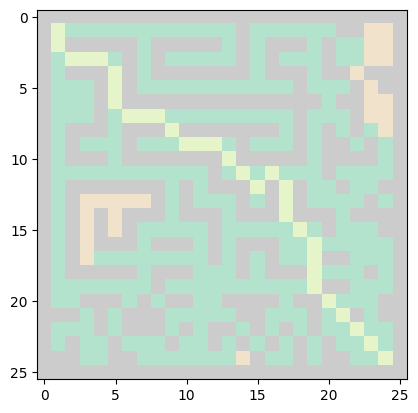

0.01199650764465332
Distance visited nodes amount: 165
Shortest path: 32


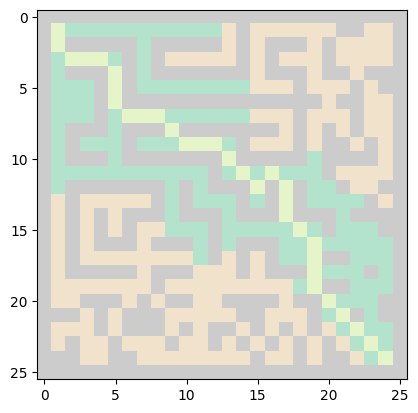

0.010015249252319336
Distance visited nodes amount: 92
Shortest path: 33


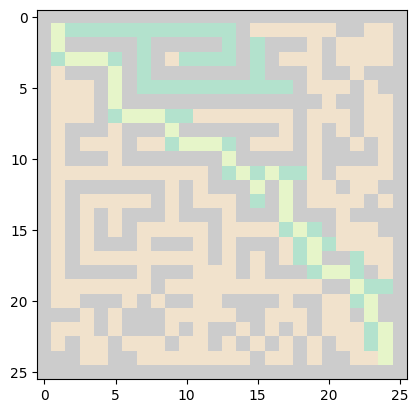

0.013231992721557617
Distance visited nodes amount: 83
Shortest path: 51


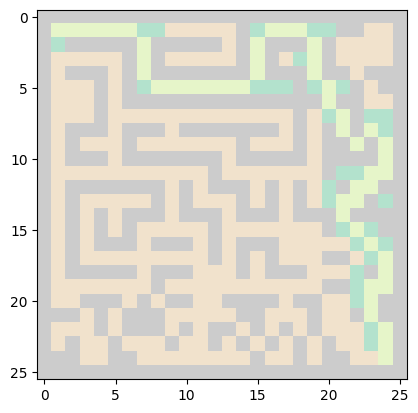

0.01632070541381836
Distance visited nodes amount: 83
Shortest path: 51


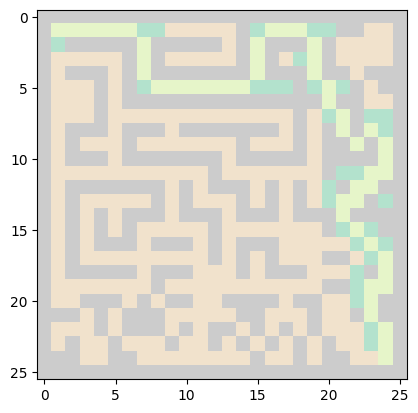

0.013874292373657227
-----------------Manhattan-----------------
Distance visited nodes amount: 62
Shortest path: 33


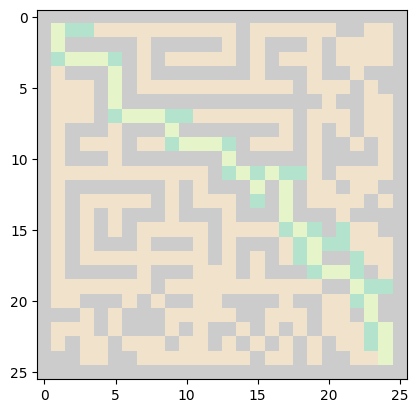

0.016439199447631836
Distance visited nodes amount: 86
Shortest path: 51


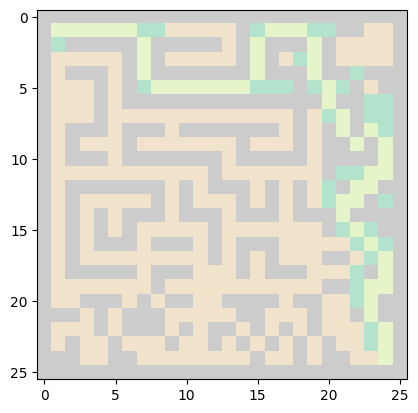

0.01904153823852539
Distance visited nodes amount: 84
Shortest path: 51


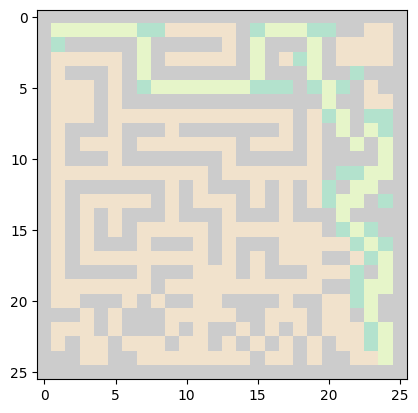

0.010895013809204102
Distance visited nodes amount: 84
Shortest path: 51


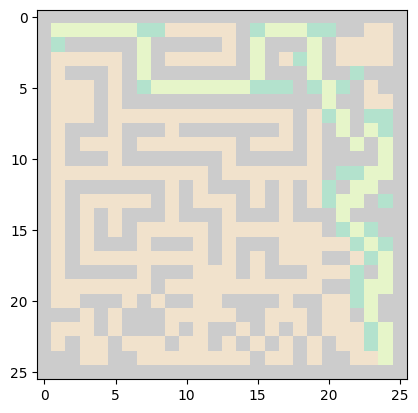

0.012590646743774414


In [73]:
print("-----------------Euclidean-----------------")
weights_euclidean = [0.3,0.8,2,5,10]
times_euclidean = []
came_from = []

for weight in weights_euclidean:
    elapsed_time, search_path = search_maze_diag(START, GOAL, weight, Euclidean_distance)
    times_euclidean.append(elapsed_time)
    came_from.append(len(search_path))
    print(elapsed_time)


print("-----------------Manhattan-----------------")
weights_manhattan = [0.8,1.6,5,10]
times_manhattan = []
came_from_manh = []

for weight in weights_manhattan:
    elapsed_time, search_path = search_maze_diag(START, GOAL,weight, Manhattan_distance)
    times_manhattan.append(elapsed_time)
    came_from_manh.append(len(search_path))
    print(elapsed_time)


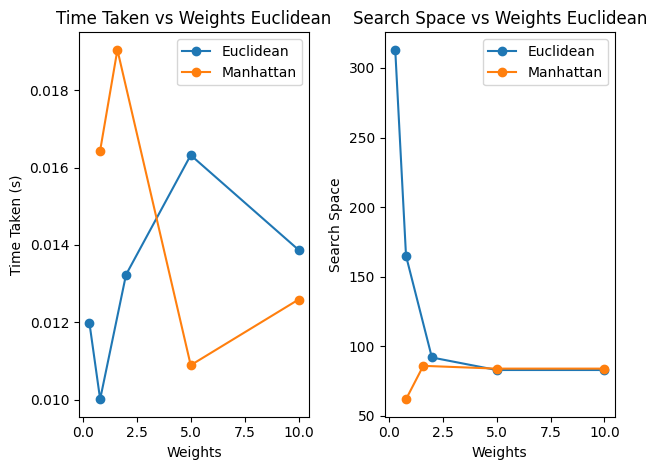

In [83]:
plt.subplot(121)
plt.plot(weights_euclidean, times_euclidean, marker='o', label='Euclidean')
plt.plot(weights_manhattan, times_manhattan, marker='o', label='Manhattan')
plt.xlabel('Weights')
plt.ylabel('Time Taken (s)')
plt.title('Time Taken vs Weights Euclidean')
plt.legend(loc="upper right")

plt.subplot(122)
plt.plot(weights_euclidean, came_from, marker='o', label='Euclidean')
plt.plot(weights_manhattan, came_from_manh, marker='o', label='Manhattan')
plt.xlabel('Weights')
plt.ylabel('Search Space')
plt.title('Search Space vs Weights Euclidean')
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

Shortest path for Dijkstra: 32


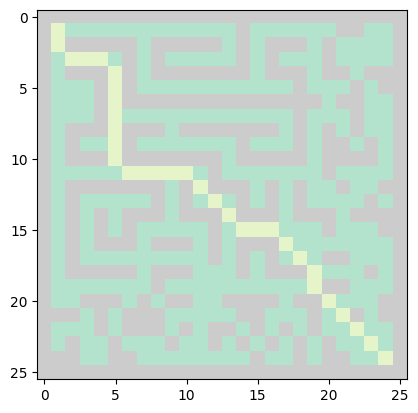

In [79]:
my_maze = build_maze("my_maze_25x25.txt")
my_graph = Find_the_edges_with_diagonal(my_maze)

prev_nodes, path = dijkstra_algorithm(my_graph, START, GOAL)
print("Shortest path for Dijkstra:",len(path))

for i in prev_nodes:
  my_maze[i[0],i[1]]=-3
for i in path:
  my_maze[i[0],i[1]]=-1
plt.imshow(my_maze, cmap='Pastel2')
plt.show()

Shortest path for BFS: 32


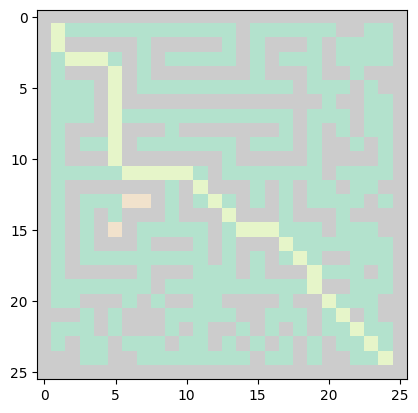

In [78]:
my_maze = build_maze("my_maze_25x25.txt")
my_graph = Find_the_edges_with_diagonal(my_maze)

prev_nodes, path = BreadthFirst(my_graph, START, GOAL)
print("Shortest path for BFS:",len(path))

for i in prev_nodes:
  my_maze[i[0],i[1]]=-3
for i in path:
  my_maze[i[0],i[1]]=-1
plt.imshow(my_maze, cmap='Pastel2')
plt.show()

### Bonus Task (10 pt): Solving "Sliding Tile Puzzle" with A*-Search
the initial and the final configurations are given at the image below.
you can use **the number of displaced tiles** as a heuristics function, $h_1$. Use W=1
add you code and print the optimal action sequence (which tile to move) from the intial to the final configuration.
![cmpe252_HW1_Bonus.png](attachment:cmpe252_HW1_Bonus.png)